## **Predicting Diabetes**

### This dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The goal is to predict based on diagnostic measures whether or not a patient has diabetes.

In [47]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from pickle import dump

### **Step 1:** Import the data

In [4]:
# Read the data from the csv file: https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

# Save the dataframe 
diabetes_df.to_csv('../data/raw/diabetes.csv', index=False)

# Print the first 5 rows of the dataframe
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **Step 2:** Perform a full EDA

In [5]:
# Dataframe info
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# duplicate rows
diabetes_df.duplicated().sum()

0

In [7]:
# NaN values
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Describe the dataframe
diabetes_df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


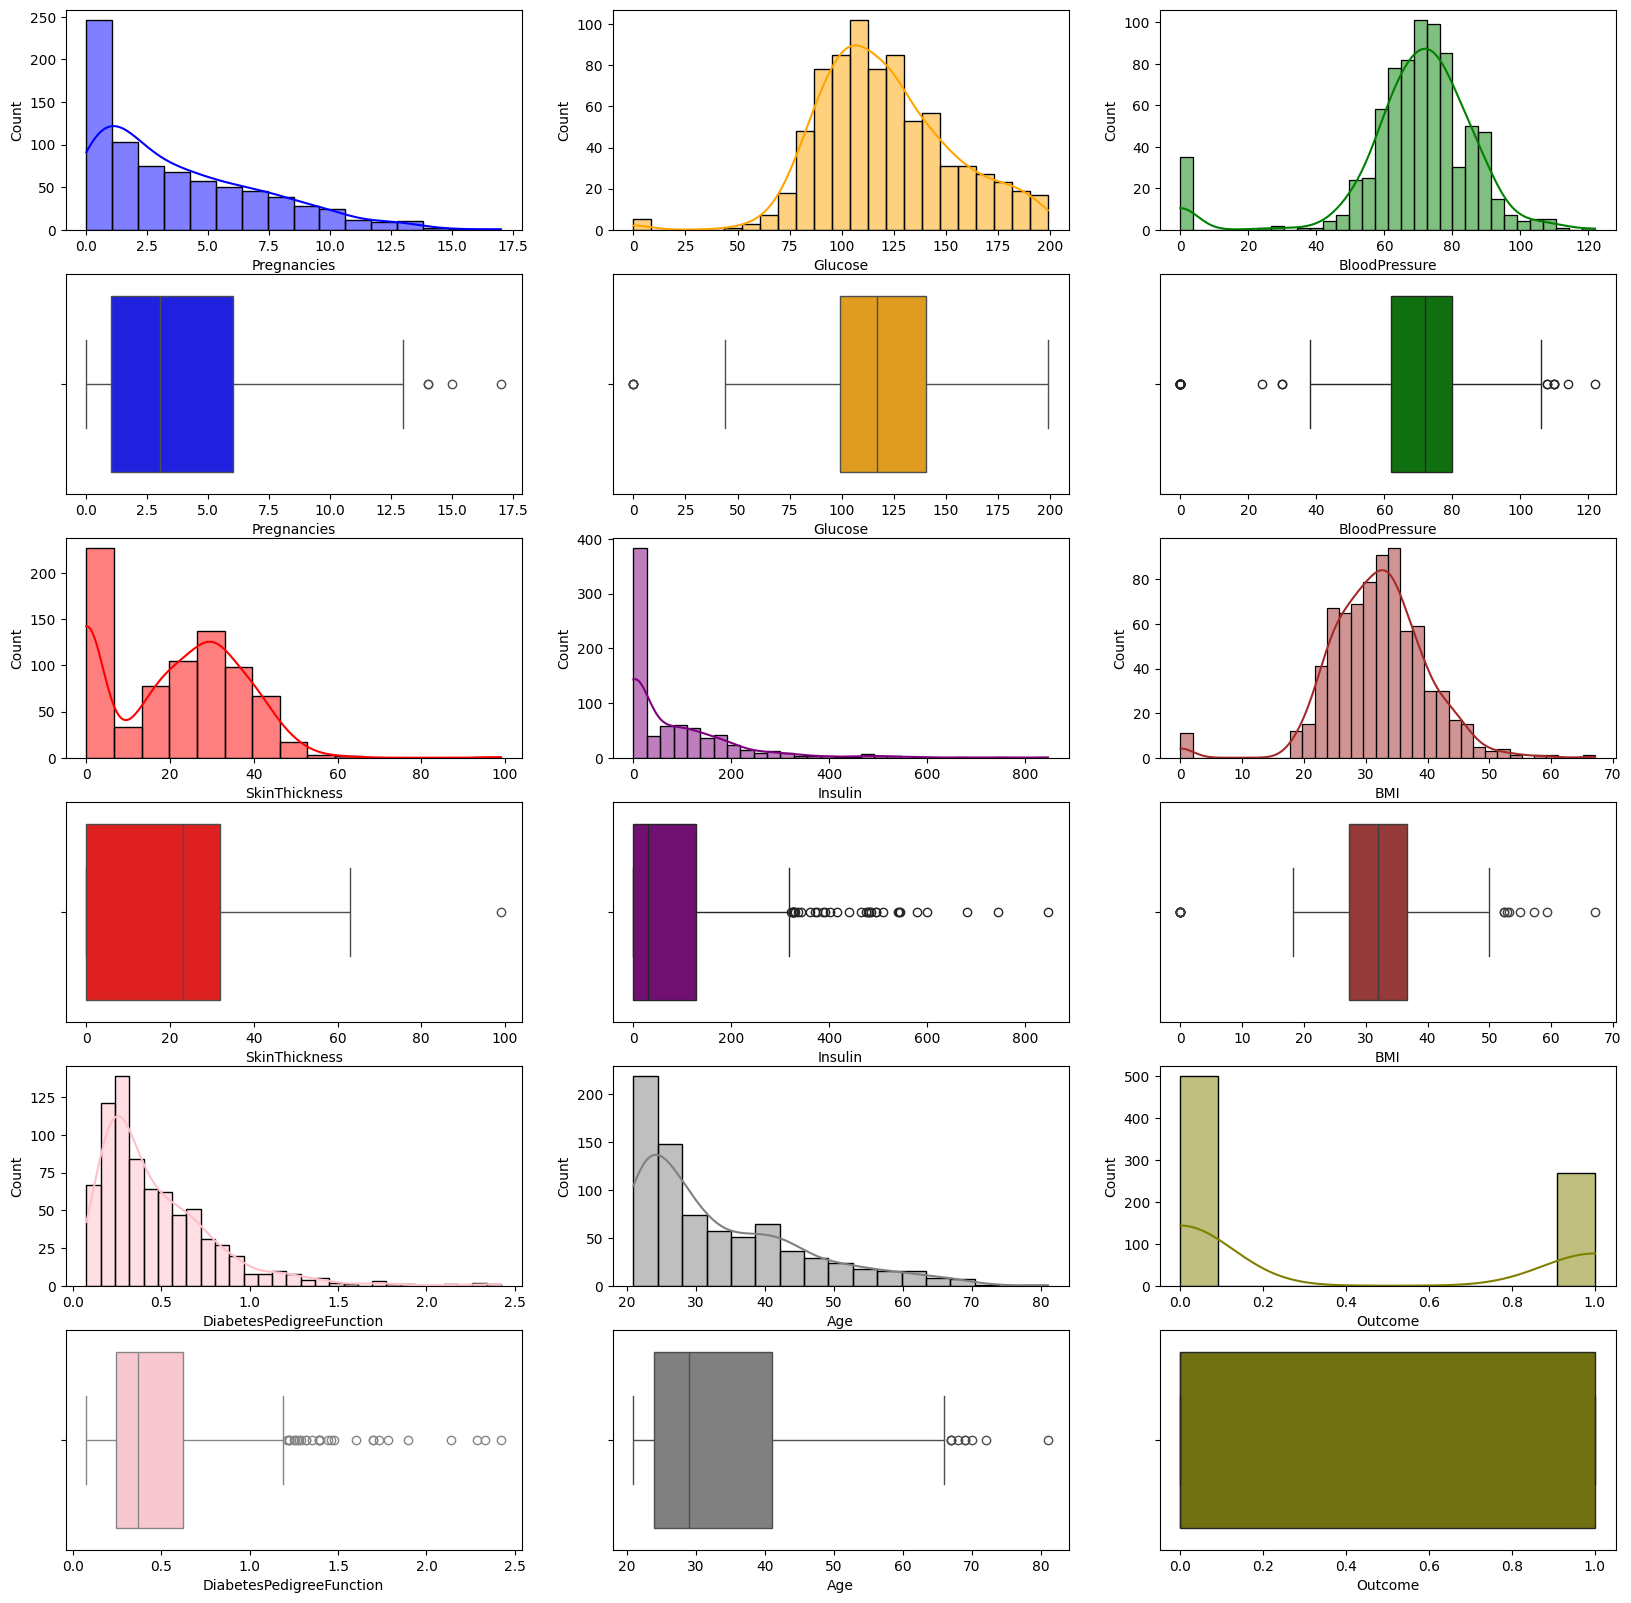

In [14]:
## Univariant analysis
# Plot the histogram and boxplot of each column
fig, ax = plt.subplots(6, 3, figsize=(20, 20))

# Define the colors
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']

# Plot the histogram and boxplot of each column
sns.histplot(ax=ax[0, 0], data=diabetes_df, x='Pregnancies', kde=True, color=colors[0])
sns.boxplot(ax=ax[1, 0], data=diabetes_df, x='Pregnancies', color=colors[0])
sns.histplot(ax=ax[0, 1], data=diabetes_df, x='Glucose', kde=True, color=colors[1])
sns.boxplot(ax=ax[1, 1], data=diabetes_df, x='Glucose', color=colors[1])
sns.histplot(ax=ax[0, 2], data=diabetes_df, x='BloodPressure', kde=True, color=colors[2])
sns.boxplot(ax=ax[1, 2], data=diabetes_df, x='BloodPressure', color=colors[2])
sns.histplot(ax=ax[2, 0], data=diabetes_df, x='SkinThickness', kde=True, color=colors[3])
sns.boxplot(ax=ax[3, 0], data=diabetes_df, x='SkinThickness', color=colors[3])
sns.histplot(ax=ax[2, 1], data=diabetes_df, x='Insulin', kde=True, color=colors[4])
sns.boxplot(ax=ax[3, 1], data=diabetes_df, x='Insulin', color=colors[4])
sns.histplot(ax=ax[2, 2], data=diabetes_df, x='BMI', kde=True, color=colors[5])
sns.boxplot(ax=ax[3, 2], data=diabetes_df, x='BMI', color=colors[5])
sns.histplot(ax=ax[4, 0], data=diabetes_df, x='DiabetesPedigreeFunction', kde=True, color=colors[6])
sns.boxplot(ax=ax[5, 0], data=diabetes_df, x='DiabetesPedigreeFunction', color=colors[6])
sns.histplot(ax=ax[4, 1], data=diabetes_df, x='Age', kde=True, color=colors[7])
sns.boxplot(ax=ax[5, 1], data=diabetes_df, x='Age', color=colors[7])
sns.histplot(ax=ax[4, 2], data=diabetes_df, x='Outcome', kde=True, color=colors[8])
sns.boxplot(ax=ax[5, 2], data=diabetes_df, x='Outcome', color=colors[8])

# Show the plot
plt.show()

Observations:
- There are no missing values
- Some of the features are skewed
- There are outliers in some of the features

In [24]:
## Multivariant analysis
# Correlation matrix
corr_matrix = diabetes_df.corr()
corr_matrix[['Outcome']].sort_values(by='Outcome', ascending=False)

,Outcome
Outcome,1.000000
Glucose,0.492740
Age,0.279333
BMI,0.269371
Pregnancies,0.199038
BloodPressure,0.183298
DiabetesPedigreeFunction,0.179638
Insulin,0.031736
SkinThickness,-0.017112


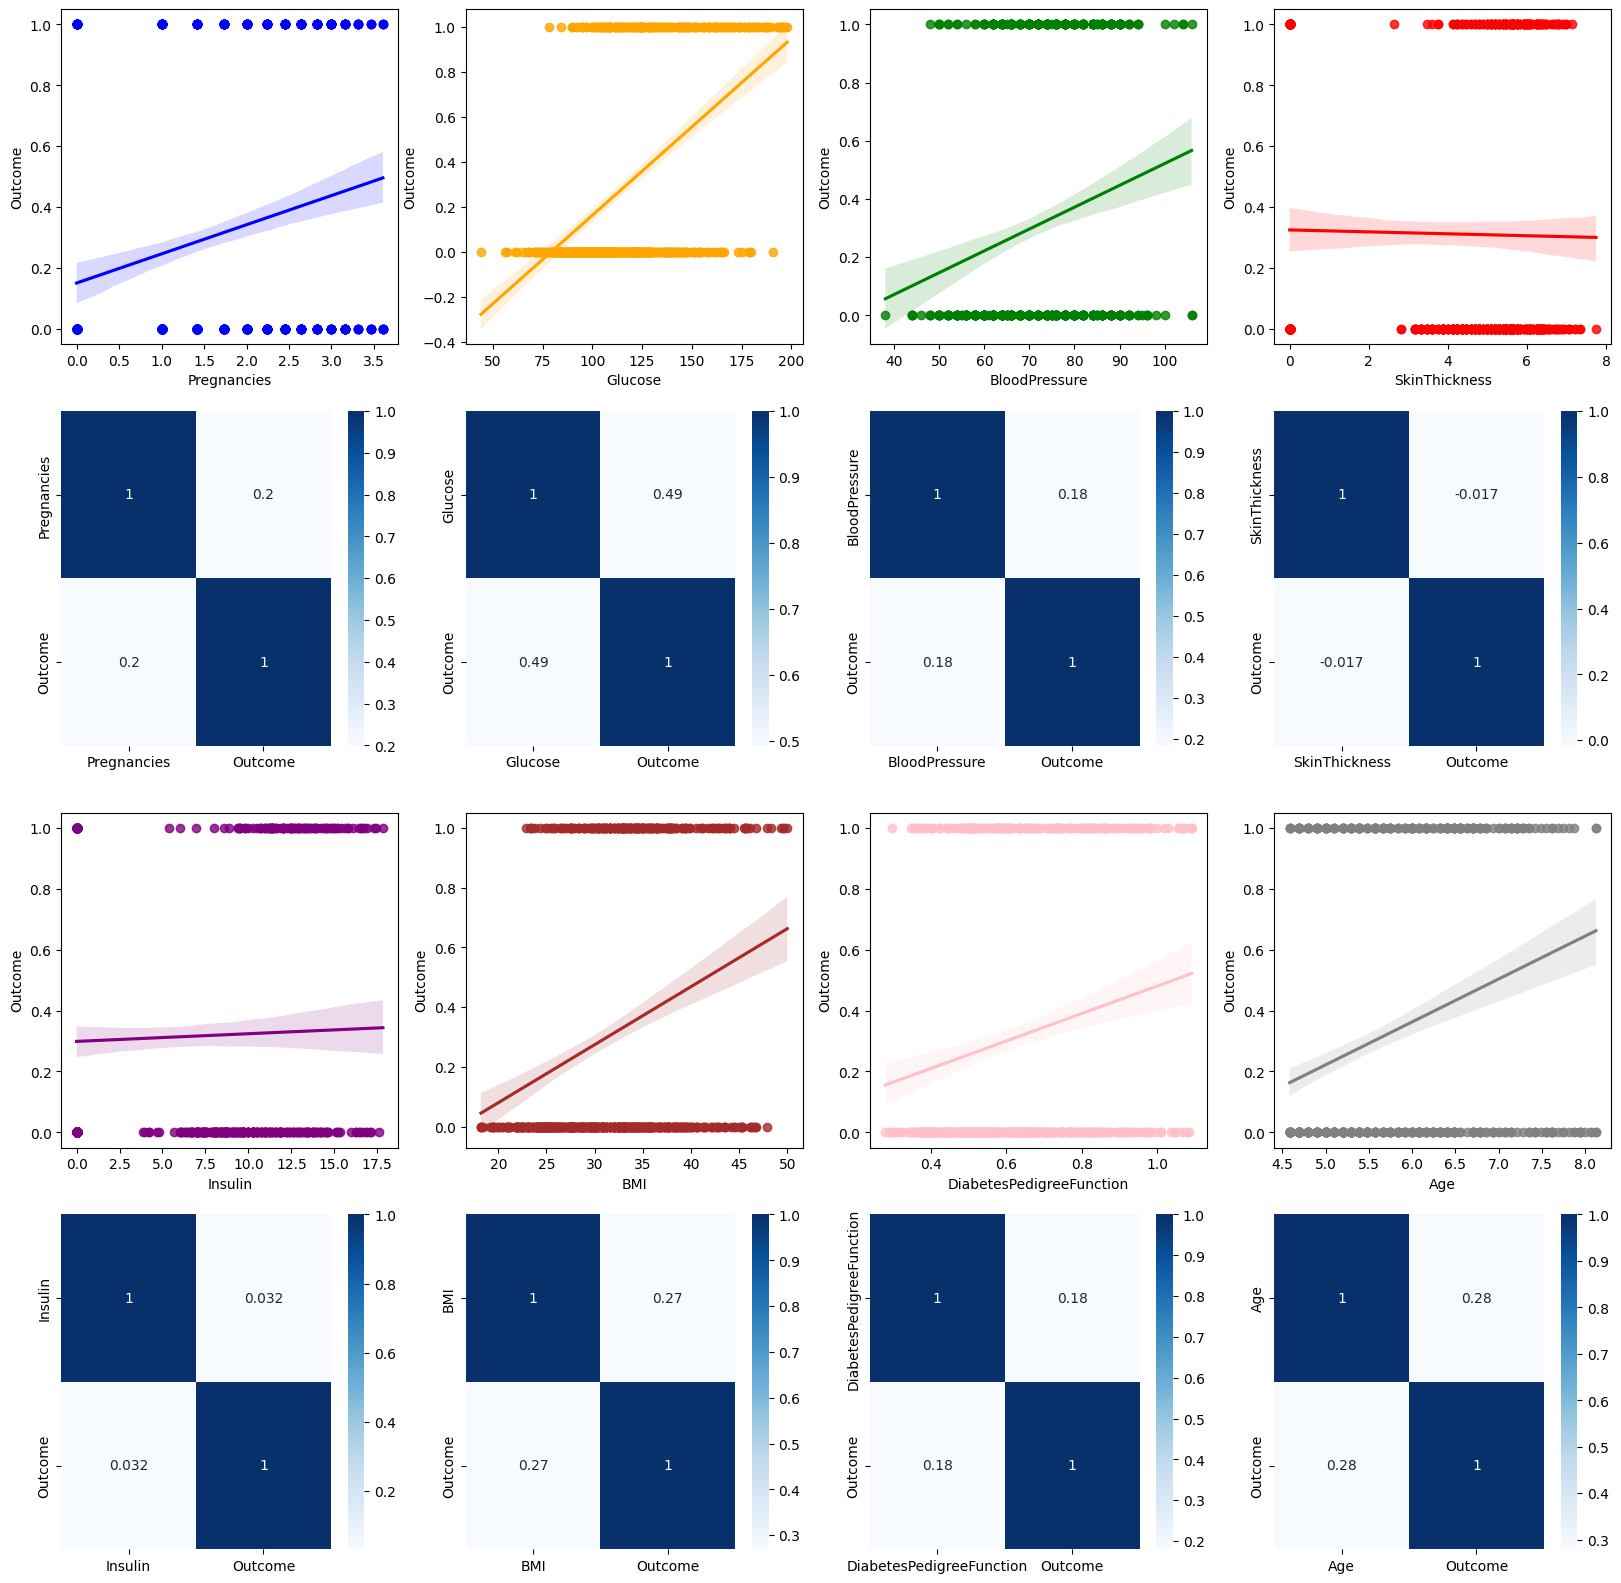

In [25]:
# Create a regplot and heatmap of the correlation with the target
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

# Plot the regplot and heatmap of the correlation with the target
sns.regplot(ax=ax[0, 0], data=diabetes_df, x='Pregnancies', y='Outcome', color=colors[0])
sns.heatmap(ax=ax[1, 0], data=diabetes_df[['Pregnancies', 'Outcome']].corr(), annot=True, cmap='Blues')
sns.regplot(ax=ax[0, 1], data=diabetes_df, x='Glucose', y='Outcome', color=colors[1])
sns.heatmap(ax=ax[1, 1], data=diabetes_df[['Glucose', 'Outcome']].corr(), annot=True, cmap='Blues')
sns.regplot(ax=ax[0, 2], data=diabetes_df, x='BloodPressure', y='Outcome', color=colors[2]) 
sns.heatmap(ax=ax[1, 2], data=diabetes_df[['BloodPressure', 'Outcome']].corr(), annot=True, cmap='Blues')
sns.regplot(ax=ax[0, 3], data=diabetes_df, x='SkinThickness', y='Outcome', color=colors[3])
sns.heatmap(ax=ax[1, 3], data=diabetes_df[['SkinThickness', 'Outcome']].corr(), annot=True, cmap='Blues')
sns.regplot(ax=ax[2, 0], data=diabetes_df, x='Insulin', y='Outcome', color=colors[4])
sns.heatmap(ax=ax[3, 0], data=diabetes_df[['Insulin', 'Outcome']].corr(), annot=True, cmap='Blues')
sns.regplot(ax=ax[2, 1], data=diabetes_df, x='BMI', y='Outcome', color=colors[5])
sns.heatmap(ax=ax[3, 1], data=diabetes_df[['BMI', 'Outcome']].corr(), annot=True, cmap='Blues')
sns.regplot(ax=ax[2, 2], data=diabetes_df, x='DiabetesPedigreeFunction', y='Outcome', color=colors[6])
sns.heatmap(ax=ax[3, 2], data=diabetes_df[['DiabetesPedigreeFunction', 'Outcome']].corr(), annot=True, cmap='Blues')
sns.regplot(ax=ax[2, 3], data=diabetes_df, x='Age', y='Outcome', color=colors[7])
sns.heatmap(ax=ax[3, 3], data=diabetes_df[['Age', 'Outcome']].corr(), annot=True, cmap='Blues')

# Show the plot
plt.show()


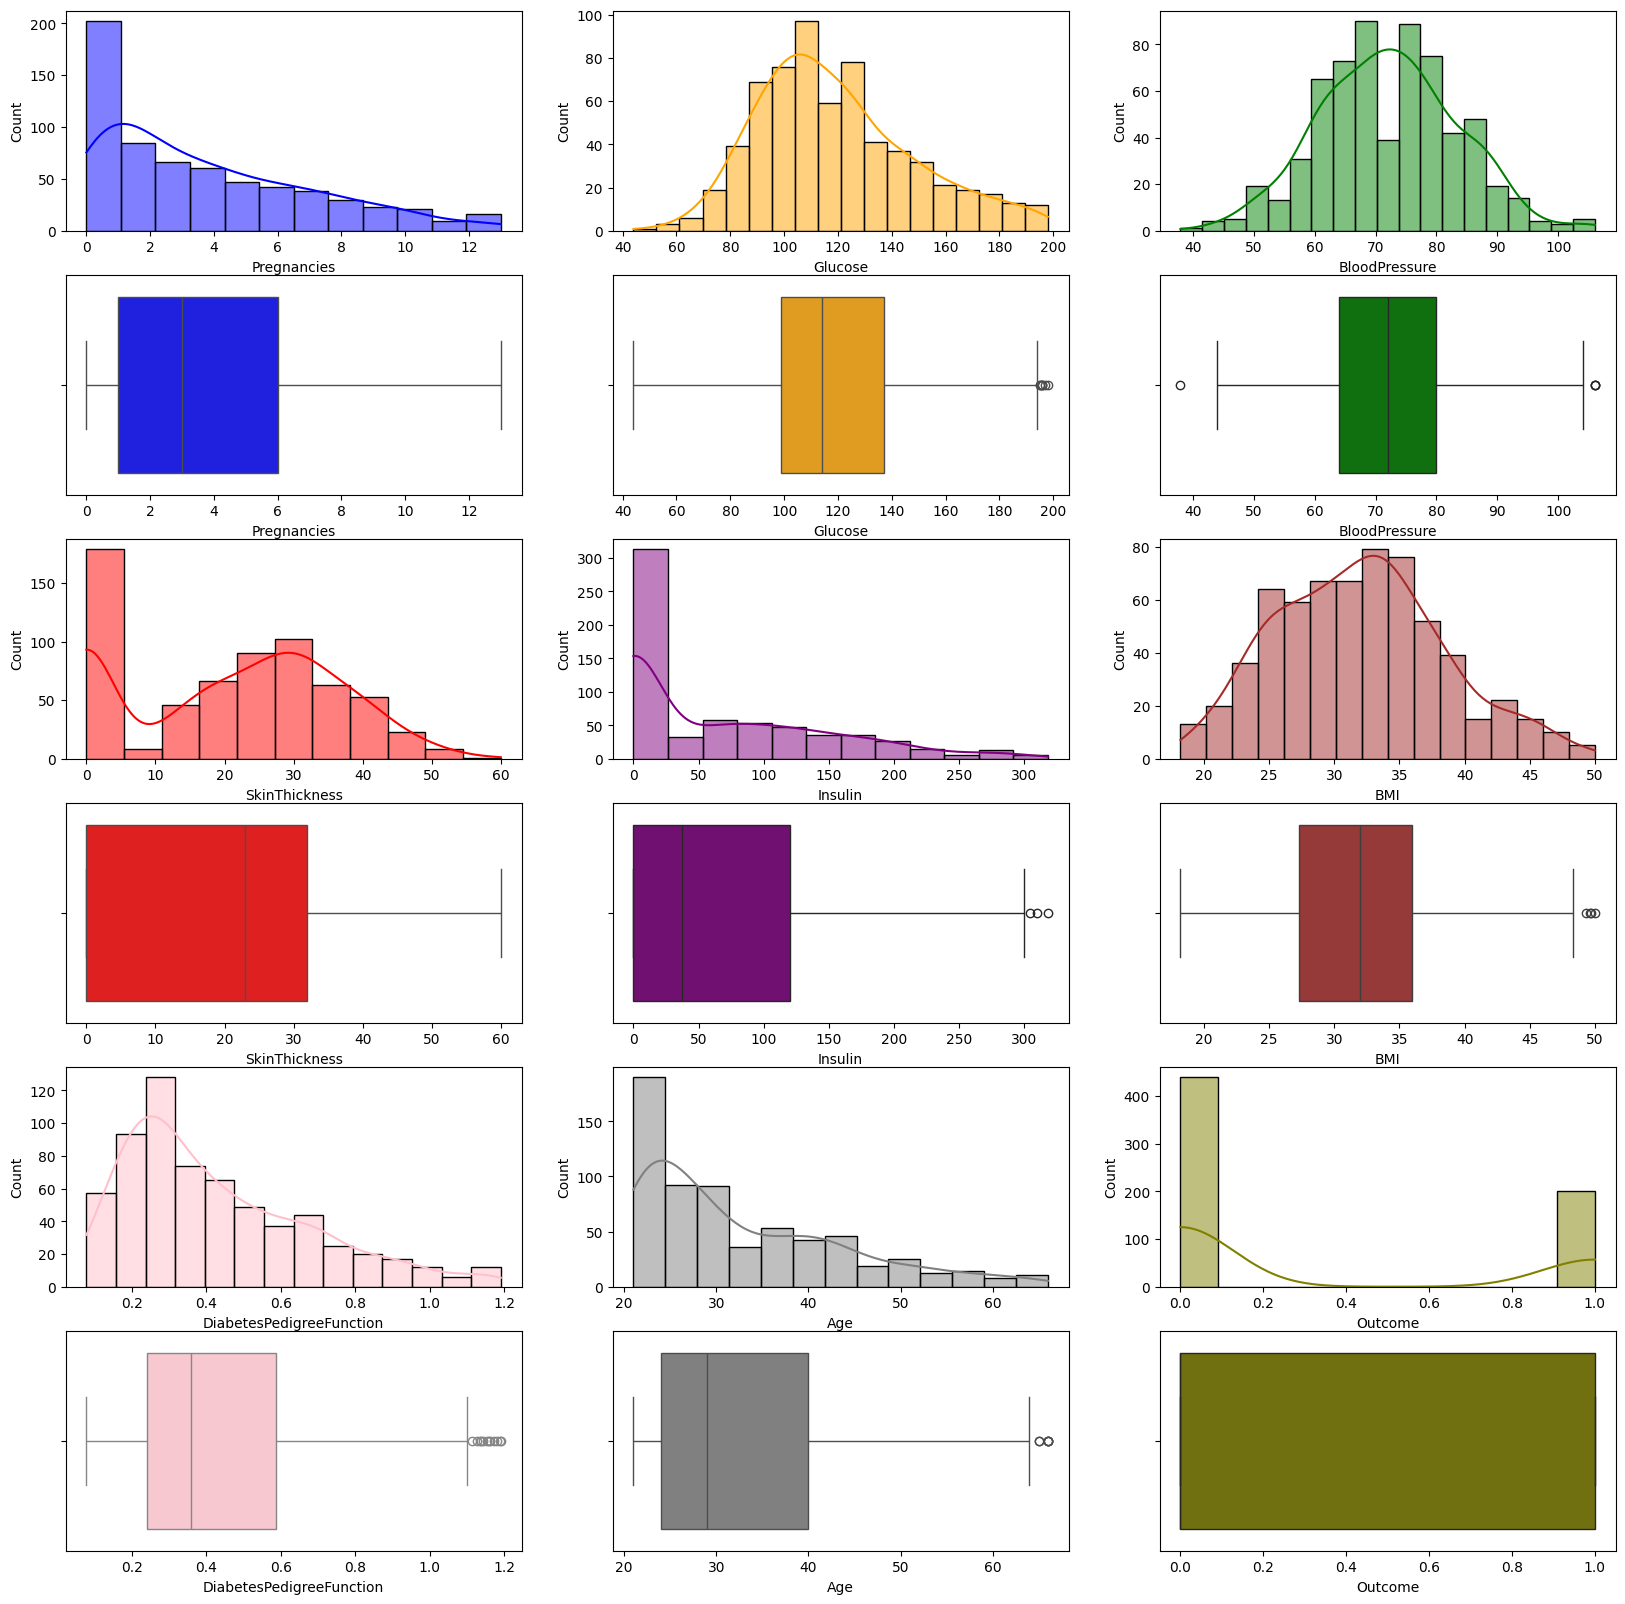

In [17]:
## Feature engineering
# Eliminate the outliers except for the outcome column
# Calculate the IQR
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3 - Q1

# Eliminate the outliers
diabetes_df = diabetes_df[~((diabetes_df < (Q1 - 1.5 * IQR)) |(diabetes_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Plot the histogram and boxplot of each column
fig, ax = plt.subplots(6, 3, figsize=(20, 20))

# Define the colors
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']

# Plot the histogram and boxplot of each column
sns.histplot(ax=ax[0, 0], data=diabetes_df, x='Pregnancies', kde=True, color=colors[0])
sns.boxplot(ax=ax[1, 0], data=diabetes_df, x='Pregnancies', color=colors[0])
sns.histplot(ax=ax[0, 1], data=diabetes_df, x='Glucose', kde=True, color=colors[1])
sns.boxplot(ax=ax[1, 1], data=diabetes_df, x='Glucose', color=colors[1])
sns.histplot(ax=ax[0, 2], data=diabetes_df, x='BloodPressure', kde=True, color=colors[2])
sns.boxplot(ax=ax[1, 2], data=diabetes_df, x='BloodPressure', color=colors[2])
sns.histplot(ax=ax[2, 0], data=diabetes_df, x='SkinThickness', kde=True, color=colors[3])
sns.boxplot(ax=ax[3, 0], data=diabetes_df, x='SkinThickness', color=colors[3])
sns.histplot(ax=ax[2, 1], data=diabetes_df, x='Insulin', kde=True, color=colors[4])
sns.boxplot(ax=ax[3, 1], data=diabetes_df, x='Insulin', color=colors[4])
sns.histplot(ax=ax[2, 2], data=diabetes_df, x='BMI', kde=True, color=colors[5])
sns.boxplot(ax=ax[3, 2], data=diabetes_df, x='BMI', color=colors[5])
sns.histplot(ax=ax[4, 0], data=diabetes_df, x='DiabetesPedigreeFunction', kde=True, color=colors[6])
sns.boxplot(ax=ax[5, 0], data=diabetes_df, x='DiabetesPedigreeFunction', color=colors[6])
sns.histplot(ax=ax[4, 1], data=diabetes_df, x='Age', kde=True, color=colors[7])
sns.boxplot(ax=ax[5, 1], data=diabetes_df, x='Age', color=colors[7])
sns.histplot(ax=ax[4, 2], data=diabetes_df, x='Outcome', kde=True, color=colors[8])
sns.boxplot(ax=ax[5, 2], data=diabetes_df, x='Outcome', color=colors[8])

# Show the plot
plt.show()

In [19]:
# Calculate the skewness of the data
skewness = diabetes_df.skew()
skewness


Pregnancies                 0.829074
Glucose                     0.603106
BloodPressure               0.104619
SkinThickness              -0.070649
Insulin                     1.008737
BMI                         0.290456
DiabetesPedigreeFunction    0.969029
Age                         1.032472
Outcome                     0.808485
dtype: float64

In [20]:
# Eliminate the skewness of the data
# Define the columns to eliminate the skewness
columns = ['Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']

# Eliminate the skewness of the data
for column in columns:
    diabetes_df[column] = diabetes_df[column].apply(lambda x: x**(1/2))

# Calculate the skewness of the data
skewness = diabetes_df.skew()
skewness

Pregnancies                -0.194557
Glucose                     0.603106
BloodPressure               0.104619
SkinThickness              -0.653447
Insulin                     0.308040
BMI                         0.290456
DiabetesPedigreeFunction    0.464479
Age                         0.786914
Outcome                     0.808485
dtype: float64

In [22]:
# Create the scaler
scaler = MinMaxScaler()

# Scale the features
scaled_features = scaler.fit_transform(diabetes_df.drop(columns=['Outcome']))

# Create the dataframe
scale_feature = scaler.fit_transform(diabetes_df)
diabetes_scaled_df = pd.DataFrame(scale_feature, index = diabetes_df.index, columns=diabetes_df.columns)
diabetes_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.679366,0.675325,0.500000,0.763763,0.000000,0.484277,0.631183,0.702674,1.0
1,0.277350,0.266234,0.411765,0.695222,0.000000,0.264151,0.385653,0.278187,0.0
2,0.784465,0.902597,0.382353,0.000000,0.000000,0.160377,0.665568,0.303343,1.0
3,0.277350,0.292208,0.411765,0.619139,0.543689,0.311321,0.159316,0.000000,0.0
5,0.620174,0.467532,0.529412,0.000000,0.000000,0.232704,0.208173,0.252622,0.0


In [28]:
## Feature selection
# Separate the features and target
X = diabetes_scaled_df.drop(columns=['Outcome'])
y = diabetes_scaled_df['Outcome']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Select the best features
selector = SelectKBest(f_regression, k=8)
selector.fit(X_train, y_train)

# Create the dataframe with the best features
X_train = pd.DataFrame(selector.transform(X_train), index=X_train.index, columns=X_train.columns[selector.get_support()])
X_test = pd.DataFrame(selector.transform(X_test), index=X_test.index, columns=X_test.columns[selector.get_support()])

# Print the dataframe
X_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
722,0.277350,0.681818,0.441176,0.695222,0.631958,0.349057,0.383572,0.535983
213,0.000000,0.623377,0.397059,0.658281,0.639379,0.767296,0.464532,0.089343
343,0.620174,0.506494,0.705882,0.000000,0.000000,0.518868,0.319233,0.328109
306,0.877058,0.759740,0.441176,0.619139,0.644278,0.229560,0.359191,0.641847
304,0.480384,0.688312,0.558824,0.000000,0.000000,0.088050,0.216352,0.423607


In [29]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
108,0.480384,0.253247,0.294118,0.718795,0.237915,0.506289,0.369894,0.117868
431,0.480384,0.292208,0.529412,0.516398,0.517006,0.383648,0.570177,0.446662
690,0.784465,0.409091,0.617647,0.000000,0.000000,0.201258,0.795422,0.352503
260,0.480384,0.954545,0.441176,0.500000,0.639379,0.399371,0.329445,0.352503
755,0.277350,0.545455,0.735294,0.806226,0.588143,0.575472,0.922142,0.423607


In [30]:
# add the target to the dataframe
X_train['Outcome'] = y_train
X_test['Outcome'] = y_test

# Save the dataframe
X_train.to_csv('../data/processed/train.csv', index=False)
X_test.to_csv('../data/processed/test.csv', index=False)


### **Step 3:** Build a Decision Tree model

In [31]:
# Read the processed data
train_data = pd.read_csv('../data/processed/train.csv')
test_data = pd.read_csv('../data/processed/test.csv')

# Separate the features and target
X_train = train_data.drop(columns=['Outcome'])
y_train = train_data['Outcome']
X_test = test_data.drop(columns=['Outcome'])
y_test = test_data['Outcome']

In [33]:
# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

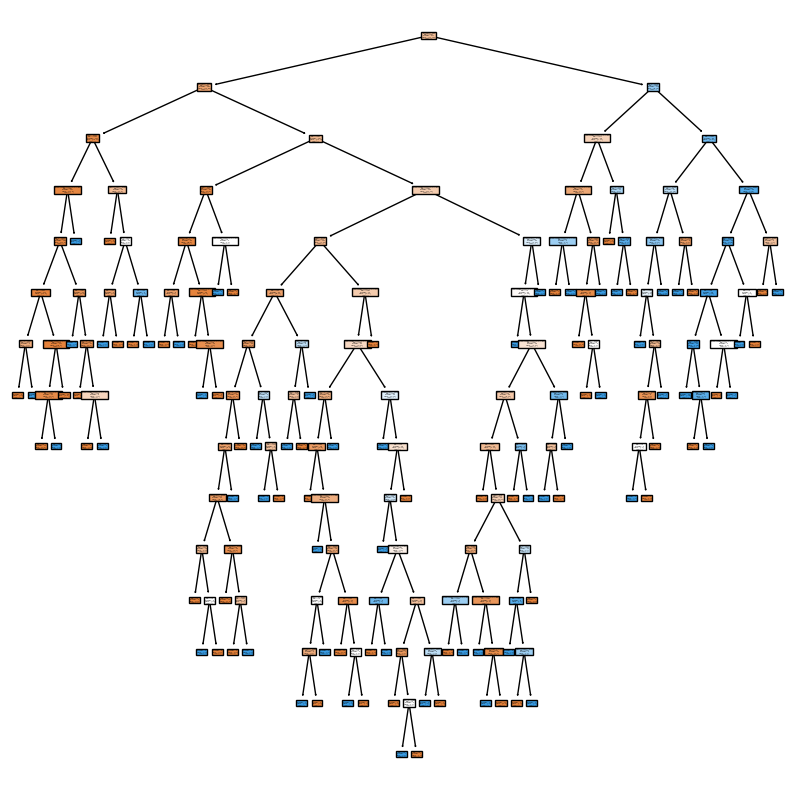

In [40]:
# Vizuallize the tree
plt.figure(figsize=(10, 10))
tree.plot_tree(model, feature_names=X_train.columns, class_names=['0', '1'], filled=True)
plt.show()

In [36]:
# Predict the test data
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0.])

In [38]:
# Calculate the accuracy score
accuracy_score(y_test, y_pred)

0.7109375

### **Step 4:** Optimize the previous model

In [42]:
# Base acurracy score
base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy

0.7109375

In [45]:
# Define the hipperparameters
hiperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'max_features': [2, 3, 4, 5, 6, 7, 8]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=hiperparameters, scoring='accuracy', cv=5, n_jobs=-1)

# Train the model
grid_search.fit(X_train, y_train)

# Print the best parameter
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 2}

In [46]:
# Adjust the model with the best parameters
model_grid = DecisionTreeClassifier(criterion='gini', max_depth=4, max_features=2, random_state=42)
model_grid.fit(X_train, y_train)

# Predict the test data
y_pred = model_grid.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred)

0.734375

### **Step 5:** Save the model

In [48]:
# Save the model
dump(model, open('../models/diabetes_decision_tree_regressor_default_42.pkl', 'wb'))
dump(model_grid, open('../models/diabetes_optimized_model.pkl', 'wb'))